In [1]:
%matplotlib inline

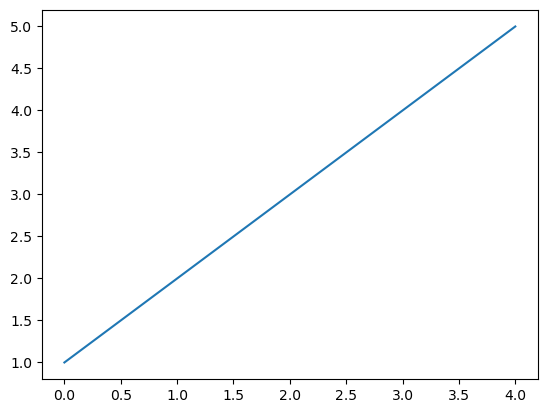

In [2]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)
from matplotlib import pylab as plt
plt.figure()
plt.plot([1,2,3,4,5])

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from pandas_summary import DataFrameSummary
import datetime

# Load preprocessed data

In [4]:
df = pd.read_feather('train_normalized_data.fth')
df_test = pd.read_feather('test_normalized_data.fth')

## Show df info

In [5]:
print(len(df))
print(len(df.columns))
display(df.head())
display(DataFrameSummary(df).summary())

844338
82


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,...,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1
3,3,3,4,2015-07-31,13995,1498,1,1.273237,0,2.144211,...,0.965073,1.072424,0,0,5,0,5,1,0,1
4,4,4,4,2015-07-31,4822,559,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1


C:\Users\marco\AppData\Local\Temp\ipykernel_14284\2860104315.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(df).summary())


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
count,844338.0,844338.0,844338.0,NaN,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,...,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0
mean,508610.35162,557.421374,2.52035,NaN,6955.959134,762.777166,1.0,0.133484,0.001418,0.038979,...,0.043288,-0.035657,2.783563,-2.869317,1.193387,0.176589,2.647116,1.184983,0.169327,2.69559
std,293698.99876,321.730861,1.723712,NaN,3103.815515,401.194153,0.0,1.023378,0.047578,1.031446,...,0.994421,0.996632,4.913429,3.193761,2.01866,0.437335,1.794482,2.013705,0.430947,1.782725
min,0.0,0.0,0.0,NaN,46.0,8.0,1.0,-0.7854,0.0,-0.466372,...,-1.183596,-4.861401,0.0,-16.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,256009.25,279.0,1.0,NaN,4859.0,519.0,1.0,-0.7854,0.0,-0.466372,...,-0.830829,-0.722938,0.0,-5.0,0.0,0.0,1.0,0.0,0.0,1.0
50%,510142.5,557.0,2.0,NaN,6369.0,676.0,1.0,-0.7854,0.0,-0.466372,...,-0.221505,0.250818,1.0,-2.0,0.0,0.0,3.0,0.0,0.0,3.0
75%,763017.75,836.0,4.0,NaN,8360.0,893.0,1.0,1.273237,0.0,-0.466372,...,0.740585,0.828985,5.0,0.0,2.0,0.0,4.0,2.0,0.0,4.0
max,1017190.0,1114.0,6.0,NaN,41551.0,7388.0,1.0,1.273237,3.0,2.144211,...,3.145812,1.072424,188.0,0.0,7.0,2.0,5.0,7.0,2.0,5.0
counts,844338,844338,844338,844338,844338,844338,844338,844338,844338,844338,...,844338,844338,844338,844338,844338,844338,844338,844338,844338,844338
uniques,844338,1115,7,942,21733,4083,1,2,4,2,...,136,147,21,17,8,3,6,8,3,6


## Categorical variables

In [6]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']
print(len(cat_vars))

22


## Continuous variables

In [7]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']
print(len(contin_vars))

18


Veo valores unicos en cada variable categorica

In [8]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3


# Asignación de dimensión de embeddings

In [9]:
cat_var_dict = {'Store': 2, 'DayOfWeek': 2, 'Year': 2, 'Month': 2,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}
print(len(cat_var_dict))

22


# Definición de modelo

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

In [11]:
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [12]:
cat_vars = ['Store', 'DayOfWeek'] #, 'SchoolHoliday_fw']
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)

contin_vars = [ ]#'BeforeStateHoliday_bool', 'Max_TemperatureC']
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

In [27]:
first_hidden_units = 50
second_hidden_units = 300
l2_lambda = 0 #1e-3
output_activation = 'linear'

merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
# x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)


In [28]:
add_customers = False

if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])
    
model.summary()
model.save_weights('initial_weights.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Store_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 DayOfWeek_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 Store_Embed (Embedding)        (None, 1, 2)         2230        ['Store_input[0][0]']            
                                                                                                  
 DayOfWeek_Embed (Embedding)    (None, 1, 2)         14          ['DayOfWeek_input[0][0]']        
                                                                                            

In [29]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [30]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()
    
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

C:\Users\marco\AppData\Local\Temp\ipykernel_14284\1524812702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
C:\Users\marco\AppData\Local\Temp\ipykernel_14284\1524812702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)
C:\Users\marco\AppData\Local\Temp\ipykernel_14284\1524812702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [31]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

get_metric(df_val, df_val['mean_by_store'])

0.3071746085338871

In [32]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [33]:
log_output = False

if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales'] #['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

In [36]:
lr = 0.0001
model.compile(optimizer=Adam(learning_rate=lr), metrics=['mse', rmspe], loss='mse')

if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)


In [37]:
epochs = 5 #20
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

Epoch 1/5

Epoch 1: val_loss improved from inf to 0.00131, saving model to bestmodel.hdf5
3181/3181 - 7s - loss: 0.0017 - mse: 0.0017 - rmspe: 0.2710 - val_loss: 0.0013 - val_mse: 0.0013 - val_rmspe: 0.2080 - 7s/epoch - 2ms/step
Epoch 2/5

Epoch 2: val_loss improved from 0.00131 to 0.00130, saving model to bestmodel.hdf5
3181/3181 - 6s - loss: 0.0017 - mse: 0.0017 - rmspe: 0.2708 - val_loss: 0.0013 - val_mse: 0.0013 - val_rmspe: 0.2096 - 6s/epoch - 2ms/step
Epoch 3/5

Epoch 3: val_loss improved from 0.00130 to 0.00130, saving model to bestmodel.hdf5
3181/3181 - 6s - loss: 0.0017 - mse: 0.0017 - rmspe: 0.2706 - val_loss: 0.0013 - val_mse: 0.0013 - val_rmspe: 0.2095 - 6s/epoch - 2ms/step
Epoch 4/5

Epoch 4: val_loss did not improve from 0.00130
3181/3181 - 6s - loss: 0.0017 - mse: 0.0017 - rmspe: 0.2706 - val_loss: 0.0013 - val_mse: 0.0013 - val_rmspe: 0.2102 - 6s/epoch - 2ms/step
Epoch 5/5

Epoch 5: val_loss improved from 0.00130 to 0.00130, saving model to bestmodel.hdf5
3181/3181 - 6s

In [25]:
model.load_weights('bestmodel.hdf5')

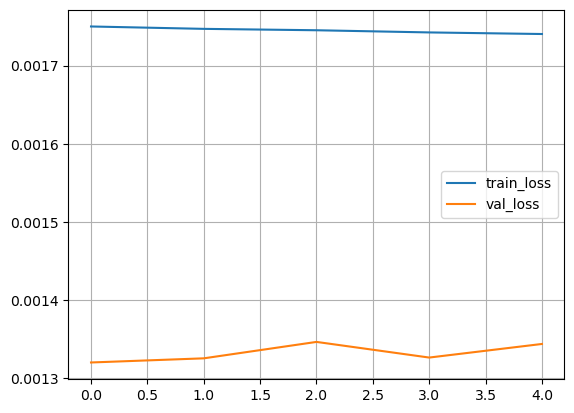

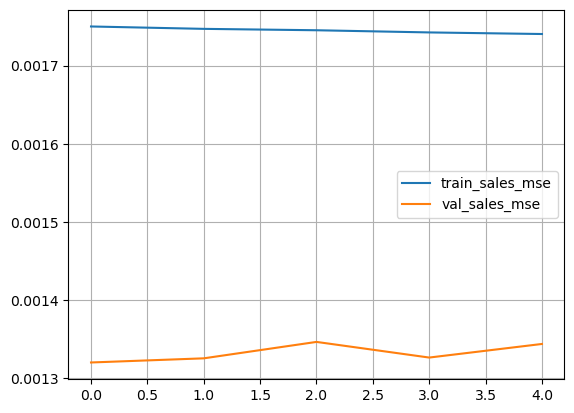

In [26]:
plt.figure()
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history['mse'],label='train_sales_mse')
plt.plot(history.history['val_mse'],label='val_sales_mse')
plt.legend()
plt.grid()

# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
#plt.show()
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_val, y_val)

# Test predictions to submit

In [ ]:
if log_output:
    # Escala logaritmica
    test_predictions = np.exp(model.predict(X_test)*max_log_y)
else:
    test_predictions = model.predict(X_test)*y_max
test_predictions[df_test['Open'] == 0] = 0

In [ ]:
sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')
sample_csv['Sales'] = test_predictions
sample_csv.head()

sample_csv.to_csv(f'submision_second_mlp_logout_{"-".join(cat_vars)}_{"-".join(contin_vars)}.csv', index=False)
